In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\Riona Almeida\\Documents\\Python (Udemy-SuperDataScience)\\SuperDataScience-Python'

In [3]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [5]:
movies.columns = ['Film','Genre','CriticRating','AudienceRating','BudgetMillions','Year']

In [7]:
movies.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions',
       'Year'],
      dtype='object')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
movies.describe() # year should be integer?? No, it should be category

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [6]:
movies.Film = movies.Film.astype('category')

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [7]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [15]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [16]:
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [17]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


### Working with joint plots

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

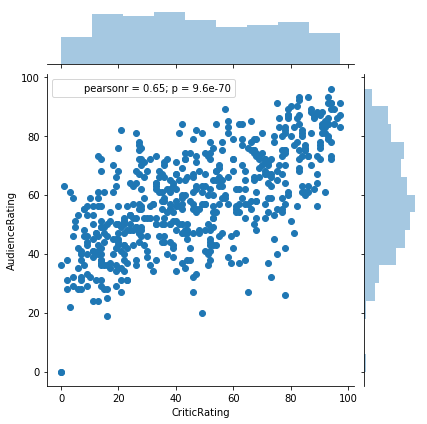

In [18]:
#Joint plots
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating' )

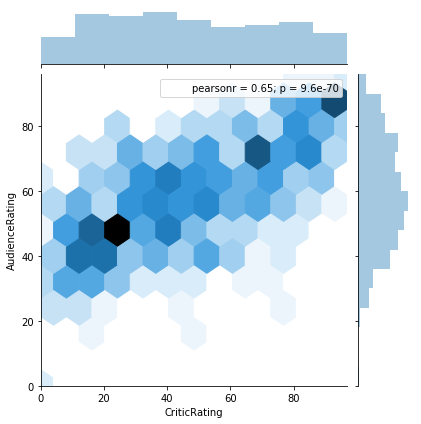

In [19]:

j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating',kind='hex' )

### Histograms

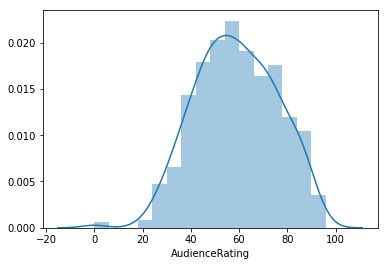

In [20]:
h = sns.distplot(movies.AudienceRating)

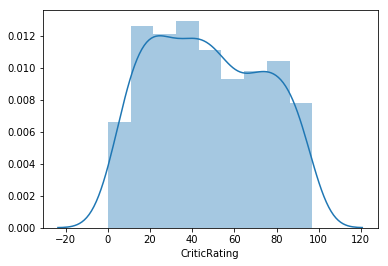

In [21]:
h2 = sns.distplot(movies.CriticRating)

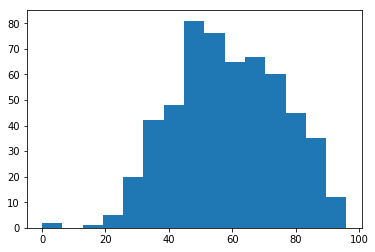

In [22]:
h3 = plt.hist(movies.AudienceRating, bins=15)

### Stacked Histograms

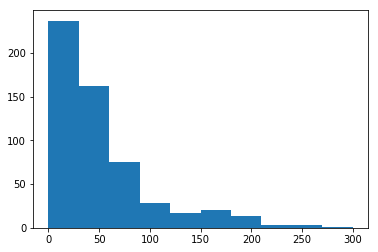

In [20]:
h11 = plt.hist(movies.BudgetMillions)

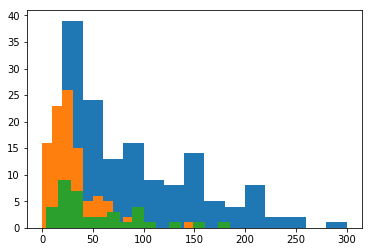

In [23]:
# filter budget by genre

plt.hist(movies[movies.Genre == "Action"].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == "Drama"].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == "Thriller"].BudgetMillions, bins=15)
plt.show()

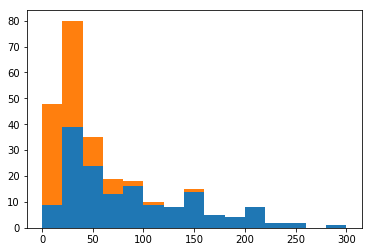

In [29]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions], 
         bins=15, stacked=True )
plt.show()

In [32]:
catlist = movies.Genre.cat.categories
catlist

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

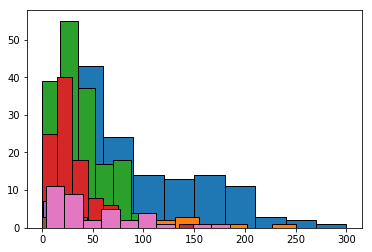

In [38]:
for i in catlist:
    plt.hist(movies[movies.Genre == i].BudgetMillions, ec='Black',stacked=True)
plt.show()

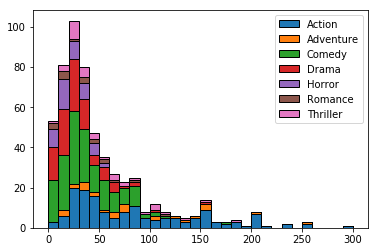

In [49]:
listcat = list()
mylabels = list()
for gen in catlist:
    listcat.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
plt.hist(listcat, ec='Black', stacked=True, bins=30,rwidth=1, label=mylabels)
plt.legend()
plt.show()

### KDE Plots

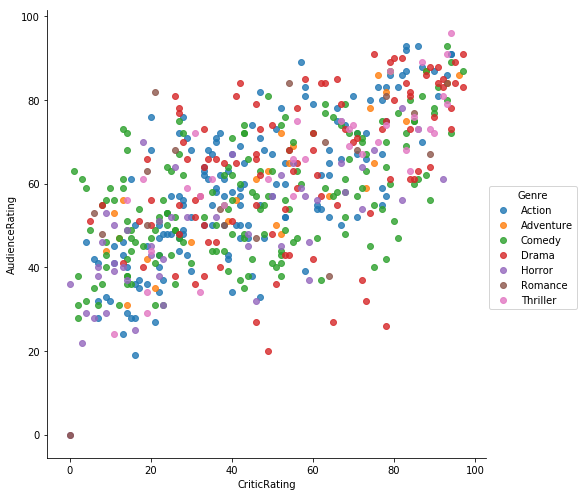

In [55]:
v1 = sns.lmplot(data=movies,x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre',
               size=7, aspect = 1)

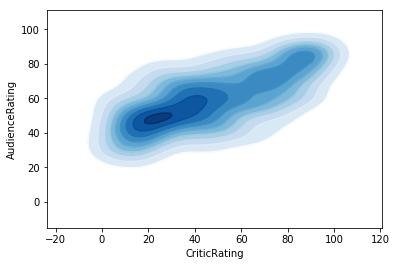

In [65]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False,
                cmap='Blues')

#Tip
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating,  
                cmap='Blues')

### working with subplots

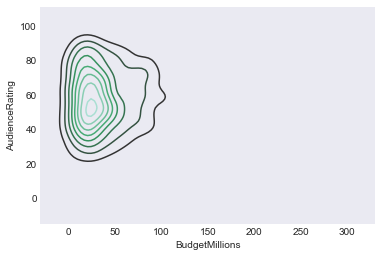

In [67]:
sns.set_style("dark")
s1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

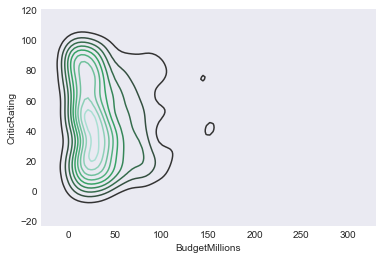

In [74]:

s2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

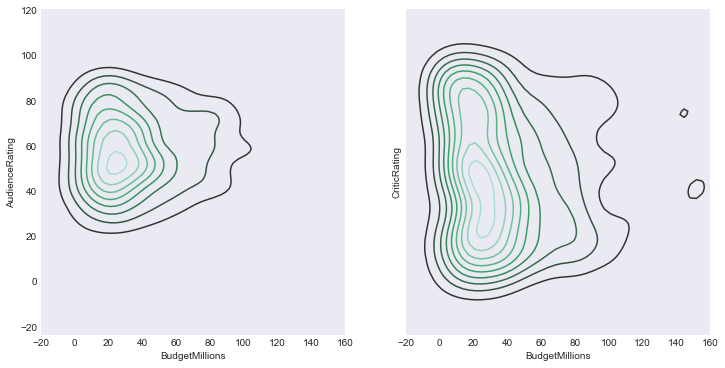

In [83]:
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

s1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
s2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
s1.set(xlim=[-20,160])


In [77]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2B38DD438>,
      dtype=object)

### Violin plots

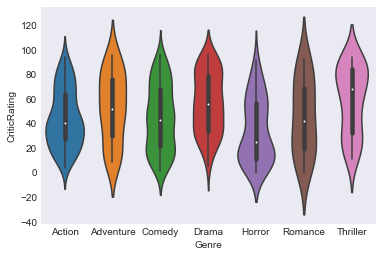

In [84]:
v = sns.violinplot(data=movies, x='Genre', y='CriticRating')

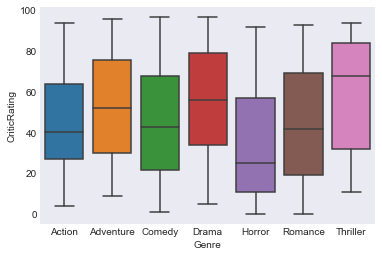

In [85]:
b = sns.boxplot(data=movies, x='Genre', y='CriticRating')

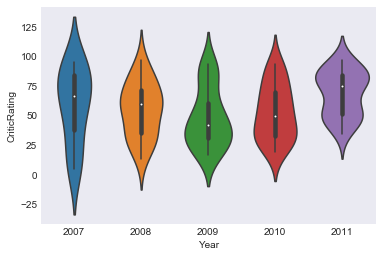

In [90]:
v2 = sns.violinplot(data=movies[movies.Genre=="Drama"], x='Year',y="CriticRating")

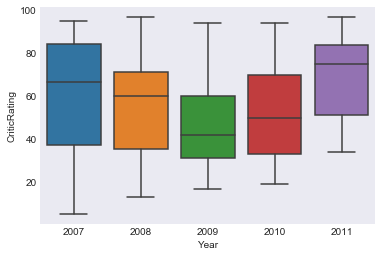

In [91]:
b2 = sns.boxplot(data=movies[movies.Genre=="Drama"], x='Year',y="CriticRating")

### Facet Grids

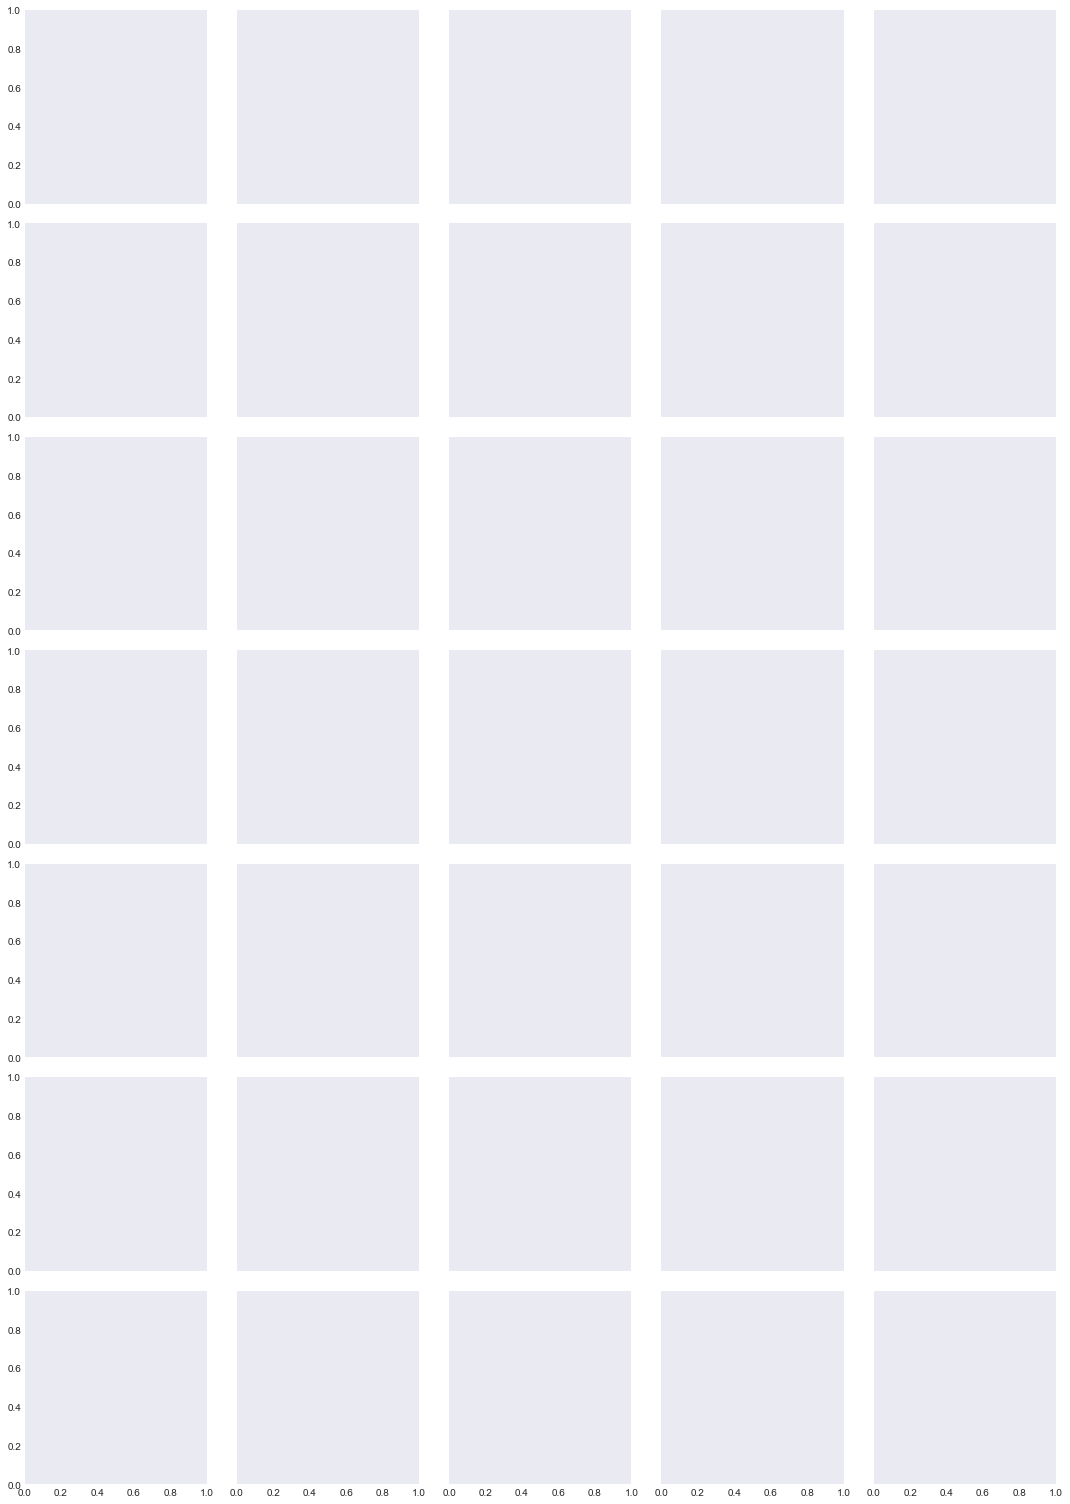

In [97]:
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")

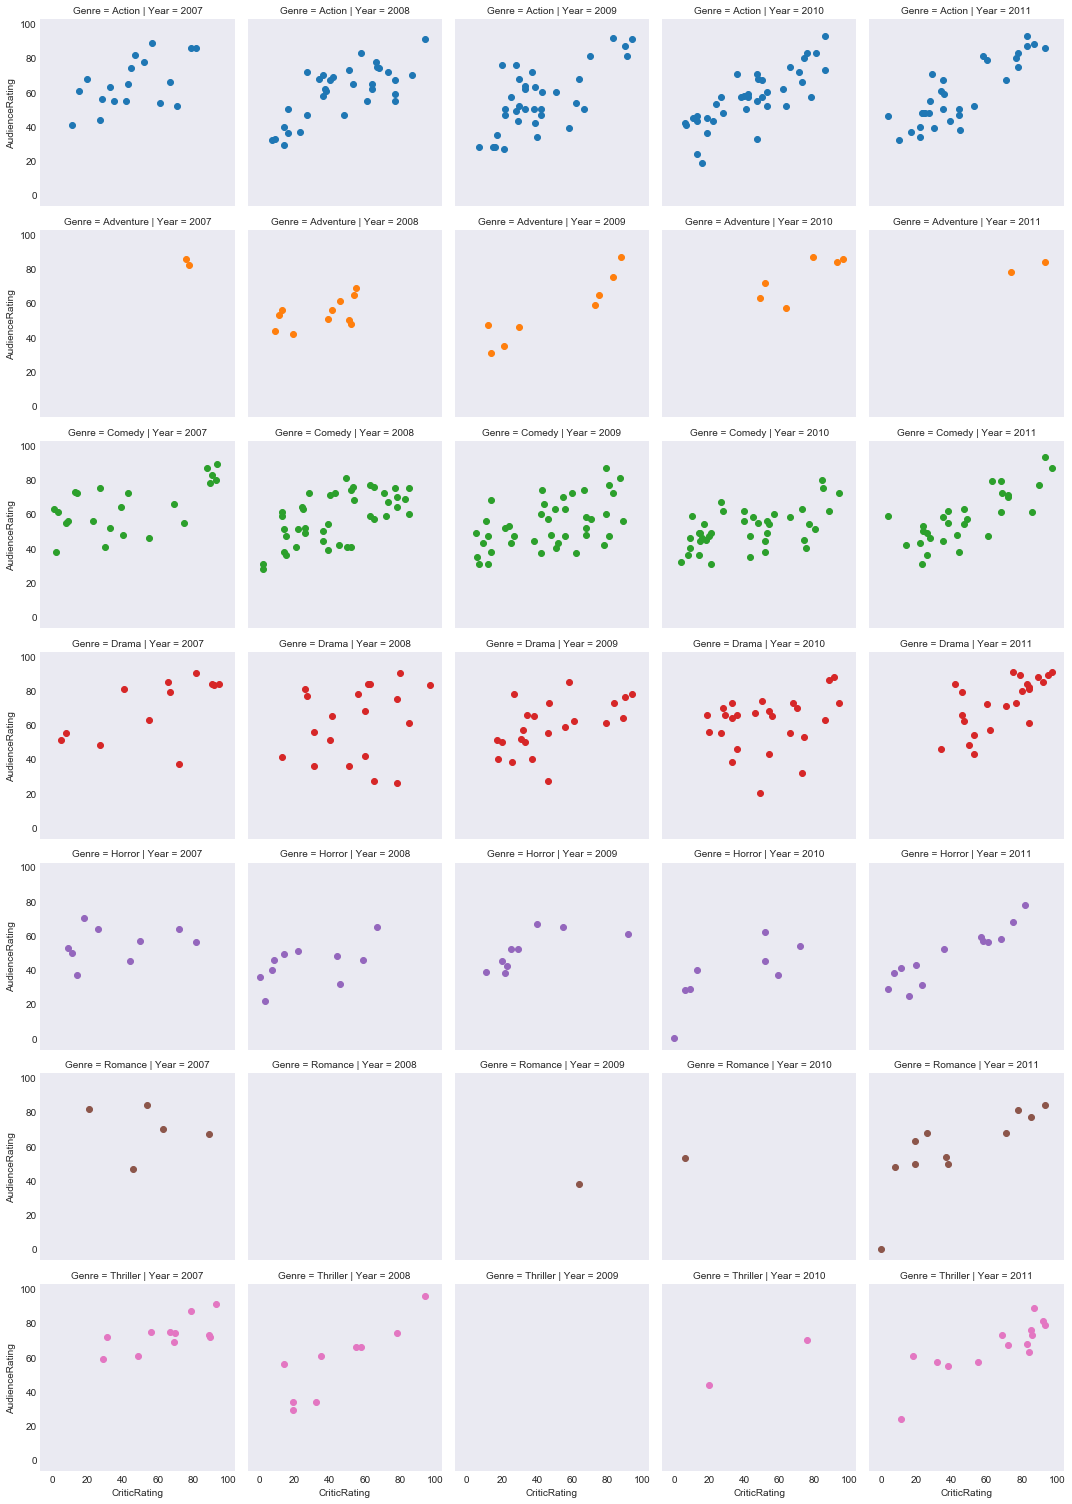

In [101]:
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

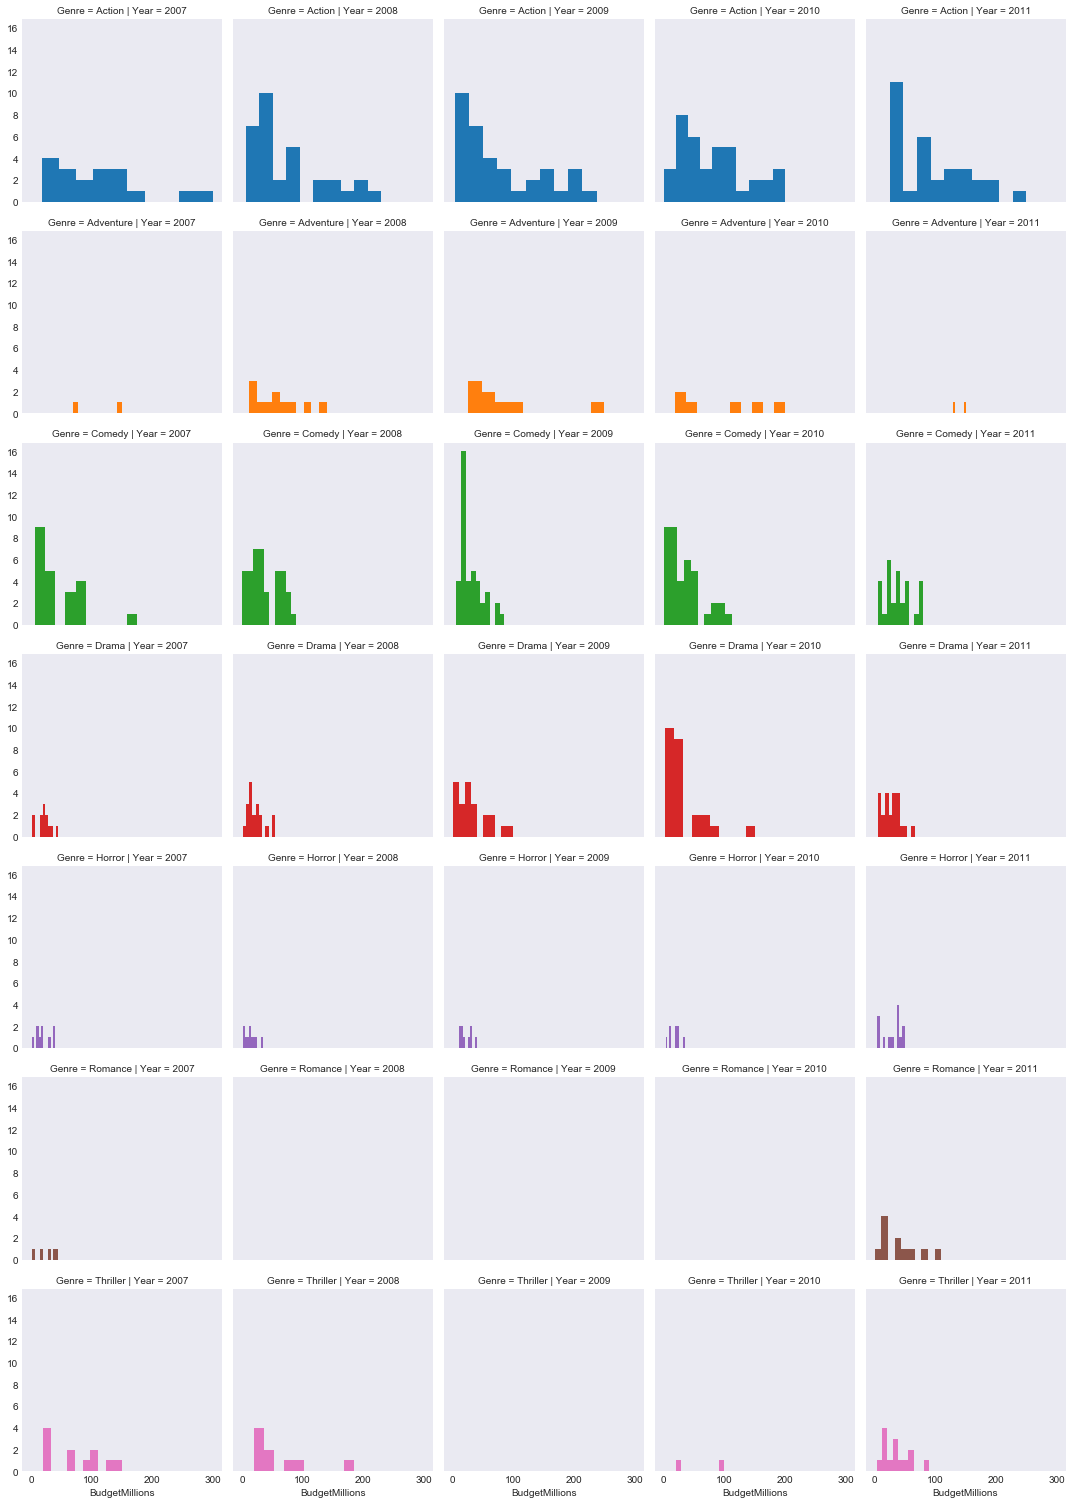

In [102]:
# can populate with any type of chart. eg. histograms
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
g = g.map(plt.hist, 'BudgetMillions')

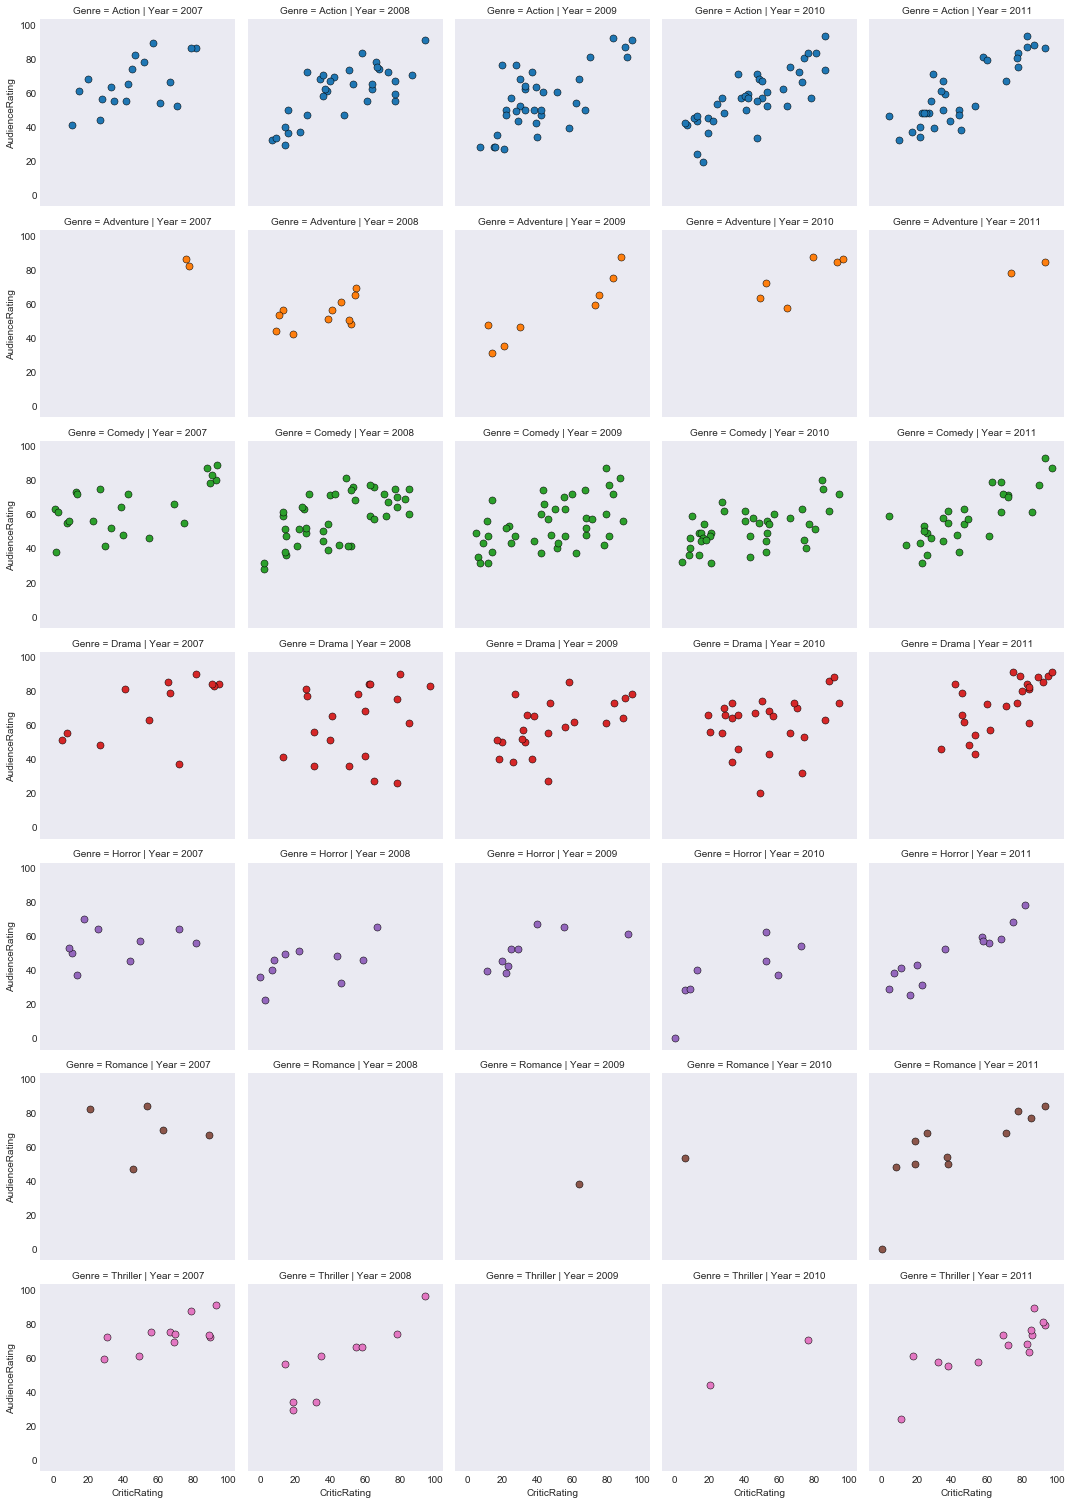

In [108]:
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

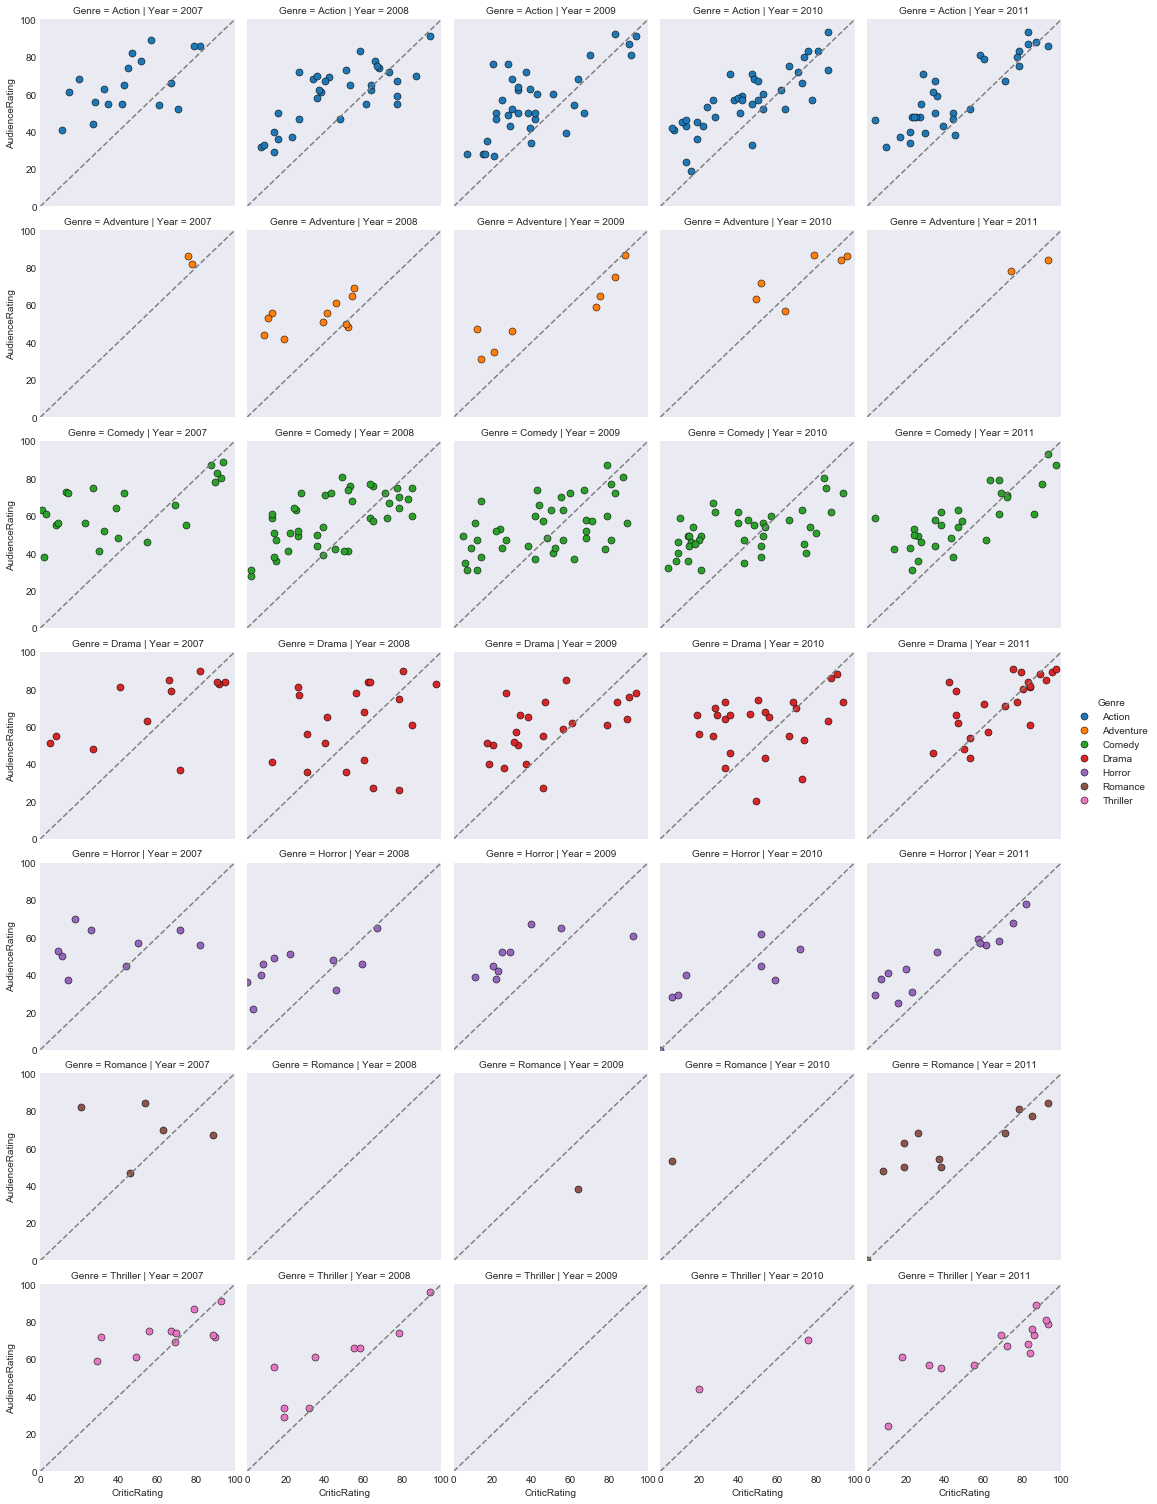

In [116]:
#controlling axes and adding diagonals
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='gray',ls="--")
g.add_legend()
    

In [ ]:
plt.legend()

### Building Dashboards

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

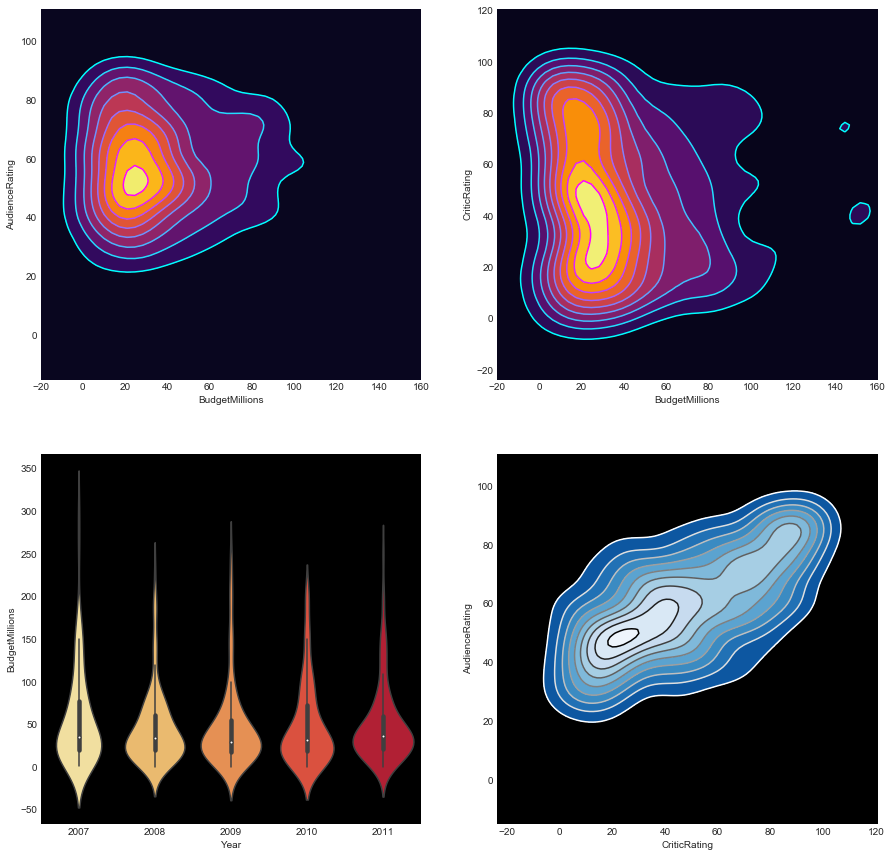

In [36]:
sns.set_style("dark", {"axes.facecolor":"black"})
f, axes = plt.subplots(2,2, figsize = (15,15))

#Plot [0,0] and [0,1]
s1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0], shade=True, shade_lowest=True,cmap='inferno')
s1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0], cmap='cool')

s2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1], shade=True, shade_lowest=True,cmap='inferno')
s2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1], cmap='cool')

s1.set(xlim=[-20,160])
s2.set(xlim=[-20,160])

#Plot[1,0]
v2 = sns.violinplot(data=movies, x='Year',y="BudgetMillions",ax=axes[1,0], palette='YlOrRd')

#Plot[1,1]
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False,
                cmap='Blues_r')

#Tip
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating,  
                cmap='gist_gray_r')

# h3 = axes[1,1].hist(movies.AudienceRating, bins=15) 
# if not a seaborn but pyplot, then specify axis position in place of plt!

#axes is an object of pyplot (See line 2), seaborn is built on top of it
#thus we need to pass extra argument to seaborn function

### Styling Dashboards